# Day 4, Part 1 - Planets in 3D and plotting 3D things

In [1]:
# usual things:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
#%matplotlib notebook

In [2]:
# okay dokey, read in the file!
names = ('RowID', 'SysName', 'planetLetter', 'NumberOfPlanets', 'Porb', 
         'ePorbU', 'ePorbL',       'a',             'ea',       'ecc', 
         'eeccU',    'eeccL',    'Incl',           'eInclU',    'eInclL', 
         'pMass',   'epMassU', 'epMassL',          'pMassType', 'sMass', 
         'esMass',  'sRadius', 'esRadiusU',       'esRadiusL',  'tTime', 
         'etTimeU', 'etTimeL')
formats = ('f4',       'S12',     'S2',               'f4',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4',
           'f4',       'f4',      'f4',               'S8',        'f4',
           'f4',       'f4',      'f4',               'f4',        'f4', 
           'f4',       'f4')
kepler_data = np.genfromtxt('../lesson03/downloads/kepler11data.txt', 
                            comments='#', 
                            delimiter=',', 
                            dtype={'names':names, 
                                   'formats':formats})


In [3]:
# convert
from sys import path
path.append('../lesson03/')
from convert_kepler_data import convert_kepler_data

star_mass, \
planet_masses, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data, use_inclination_3d=True)

In [4]:
# solve
from sys import path
path.append('../lesson02/')

from hermite_library import do_hermite

# h is for hermite!
r_h, v_h, t_h, e_h = do_hermite(star_mass, 
                                planet_masses, 
                                planet_initial_position, 
                                planet_initial_velocity, 
                               tfinal=200, Nsteps=8800, 
                               threeDee=True)

t_h = t_h/(365.*24*60*60)
e_h = (e_h-e_h[0])/e_h[0]

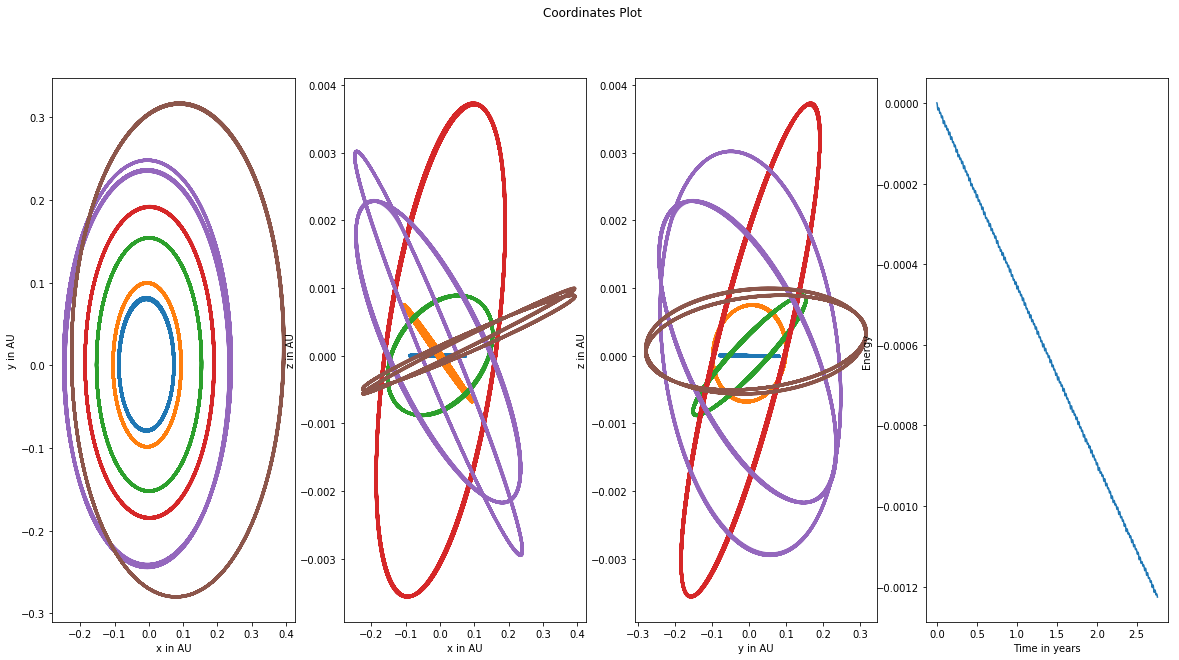

In [5]:
# let's plot in multi-d
fig, ax = plt.subplots(1, 4, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

# for plots 0->2
ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

ax[1].set_xlabel('x in AU')
ax[1].set_ylabel('z in AU')

ax[2].set_xlabel('y in AU')
ax[2].set_ylabel('z in AU')

# plot Euler's solution, particle 1, x-y
for i in range(len(planet_masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(len(planet_masses)):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(len(planet_masses)):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, e_h)

plt.show()

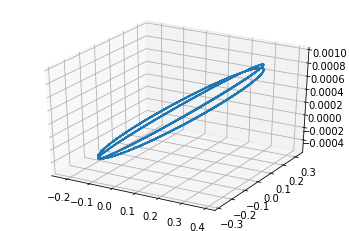

In [6]:
# now plot in 3D
from mpl_toolkits import mplot3d
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
#ax = fig.add_subplot(111, projection='3d')


# for first planet
ax.plot3D(r_h[i,0,:], r_h[i,1,:], r_h[i,2,:])

plt.show()

### Exercise
Add all the other planets to this plot.

Bonus bonus: How would you make an animation of this?

# Galaxy simulations

In [7]:
# note: we can even read from the web!
# this is a 100 particle (in stars and DM) initial conditions
names = ('Ptype', 'x', 'y', 'z', 'vx', 'vy', 'vz')
formats=  ('f8',   'f8', 'f8','f8', 'f8','f8', 'f8')
galaxy_data = np.genfromtxt("https://jnaiman.github.io/csci-p-14110/lesson04/galaxySnaps/snap_001_fac1n3.txt", 
                           delimiter=",", 
                            dtype={'names':names, 
                                   'formats':formats})

In [8]:
galaxy_data

array([(1., -31.80722427, -9.48369141e+01, -2.66281261e+01,  139.85939026,   33.89159393,   10.28887367),
       (1., -25.45440292,  2.78744245e+00, -6.98595524e+00,  -33.88238907,   96.8704071 ,  -34.19593811),
       (1., -46.64917374, -2.97884789e+01, -1.11127405e+01,  142.41798401,  -73.10621643, -141.17626953),
       (1., -33.41591263, -6.61078491e+01, -6.97367096e+01,   45.44406509,   27.67384529,   55.48738861),
       (1., -80.55812073, -6.63692703e+01, -1.63235512e+01,   44.21417618,  -86.23680115,  -67.03777313),
       (1., -66.03520203, -3.71939774e+01, -1.60895920e+01,   68.70942688,   73.80644226,   -1.33114088),
       (1., -56.10348129, -2.73020420e+01, -9.95618725e+00,  126.39978027,  162.51345825,   26.90430832),
       (1., -58.53800964, -3.71932106e+01, -8.45256042e+00,  206.15211487,   93.15518951,   58.04782486),
       (1., -56.93934631, -3.61453362e+01, -5.43898964e+00,  255.52142334,  121.31546021,   40.11421204),
       (1., -56.50887299, -1.18742981e+01, -1.

In [10]:
# convert galaxy data
from convert_galaxy_data import convert_galaxy_data

masses, pos, vel = convert_galaxy_data(galaxy_data)

In [11]:
# import the galaxy library
from hermite_library import do_hermite_galaxies

# note: this will likely take a good long while
# note that tfinal has changed - this is because our scales are very different!
r_h, v_h, t_h, e_h = do_hermite_galaxies(masses, pos, vel, tfinal=0.001, Nsteps = 100)


In [12]:
t_h = t_h/(365.*24*60*60)
e_h = (e_h-e_h[0])/e_h[0]

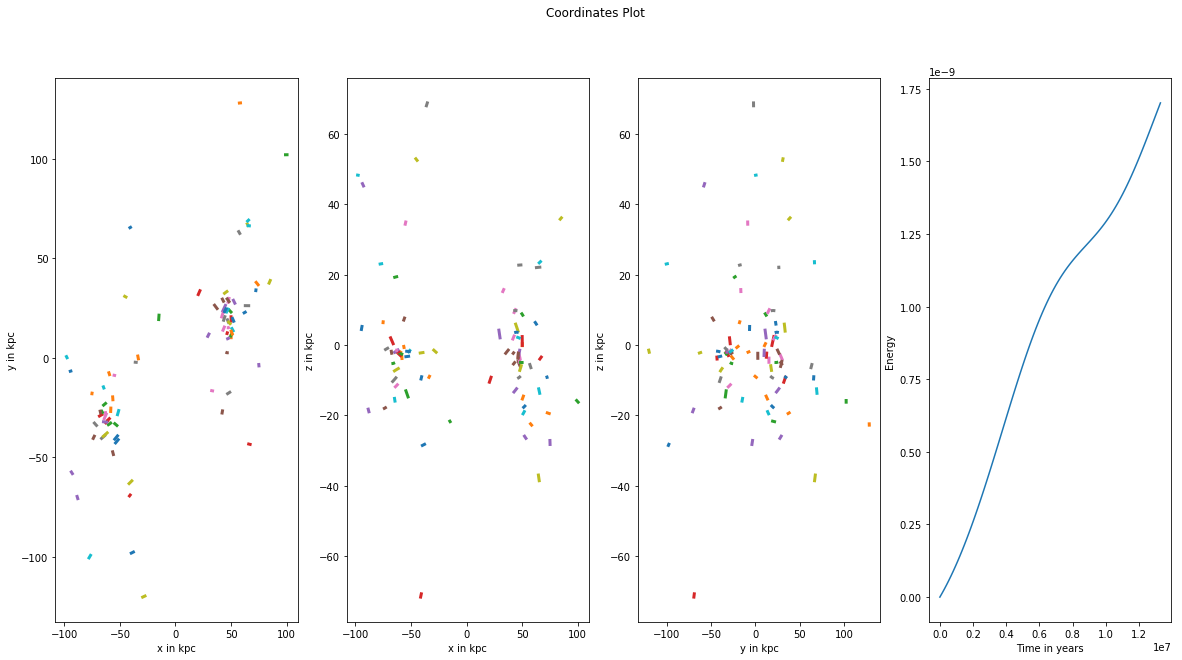

In [13]:
# let's plot in multi-d
fig, ax = plt.subplots(1, 4, figsize = (10*2, 10))
fig.suptitle('Coordinates Plot')

# for plots 0->2
ax[0].set_xlabel('x in kpc')
ax[0].set_ylabel('y in kpc')

ax[1].set_xlabel('x in kpc')
ax[1].set_ylabel('z in kpc')

ax[2].set_xlabel('y in kpc')
ax[2].set_ylabel('z in kpc')

# plot Euler's solution, particle 1, x-y
for i in range(len(masses)):
    ax[0].plot(r_h[i,0,:], r_h[i,1,:], lw=3)

for i in range(len(masses)):
    ax[1].plot(r_h[i,0,:], r_h[i,2,:], lw=3)

for i in range(len(masses)):
    ax[2].plot(r_h[i,1,:], r_h[i,2,:], lw=3)
    
    
ax[3].set_xlabel('Time in years')
ax[3].set_ylabel('Energy')
# re-norm energy
ax[3].plot(t_h, e_h)

plt.show()